# **Object Proposal**

In [4]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw
from torchvision.io import read_image
from torchvision.transforms import functional as F
from torchvision.models.detection.transform import GeneralizedRCNNTransform
from torchvision.models.detection import (
    fasterrcnn_mobilenet_v3_large_320_fpn,
    fasterrcnn_mobilenet_v3_large_fpn,
)

In [5]:
df = pd.read_csv("../Dataset/train_small.csv", header=None)
df.columns = ["Image", "Label"]
df.head()

Image  Label
0             Image  Label
1  train_059371.jpg      0
2  train_059389.jpg      0
3  train_059425.jpg      0
4  train_059445.jpg      0

In [6]:
# Load Pre-trained Faster R-CNN
model = fasterrcnn_mobilenet_v3_large_320_fpn(
    weights="FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.COCO_V1"
)
model.eval()
rpn = model.rpn
transform = model.transform  # Get the model's transform

In [7]:
def apply_rpn(image_path, ax):
    # Load image using PIL
    image = Image.open(image_path).convert("RGB")

    # Convert to PyTorch tensor
    img_tensor = F.to_tensor(image).unsqueeze(0)  # Add batch dimension

    # Apply the model's transform to get proper ImageList
    with torch.no_grad():
        transformed_image_list = transform(img_tensor)[
            0
        ]  # Get the transformed ImageList
        features = model.backbone(transformed_image_list.tensors)

        # Apply RPN to get proposals
        proposals, _ = rpn(transformed_image_list, features)

    # Convert proposals to numpy and select top 50 proposals
    proposals = proposals[0].cpu().numpy()[:3]

    # Draw proposals on the image using PIL
    draw = ImageDraw.Draw(image)
    for x1, y1, x2, y2 in proposals:
        draw.rectangle([x1, y1, x2, y2], outline="red", width=2)

    # Show image with proposals using Matplotlib
    ax.imshow(image)
    ax.axis("off")

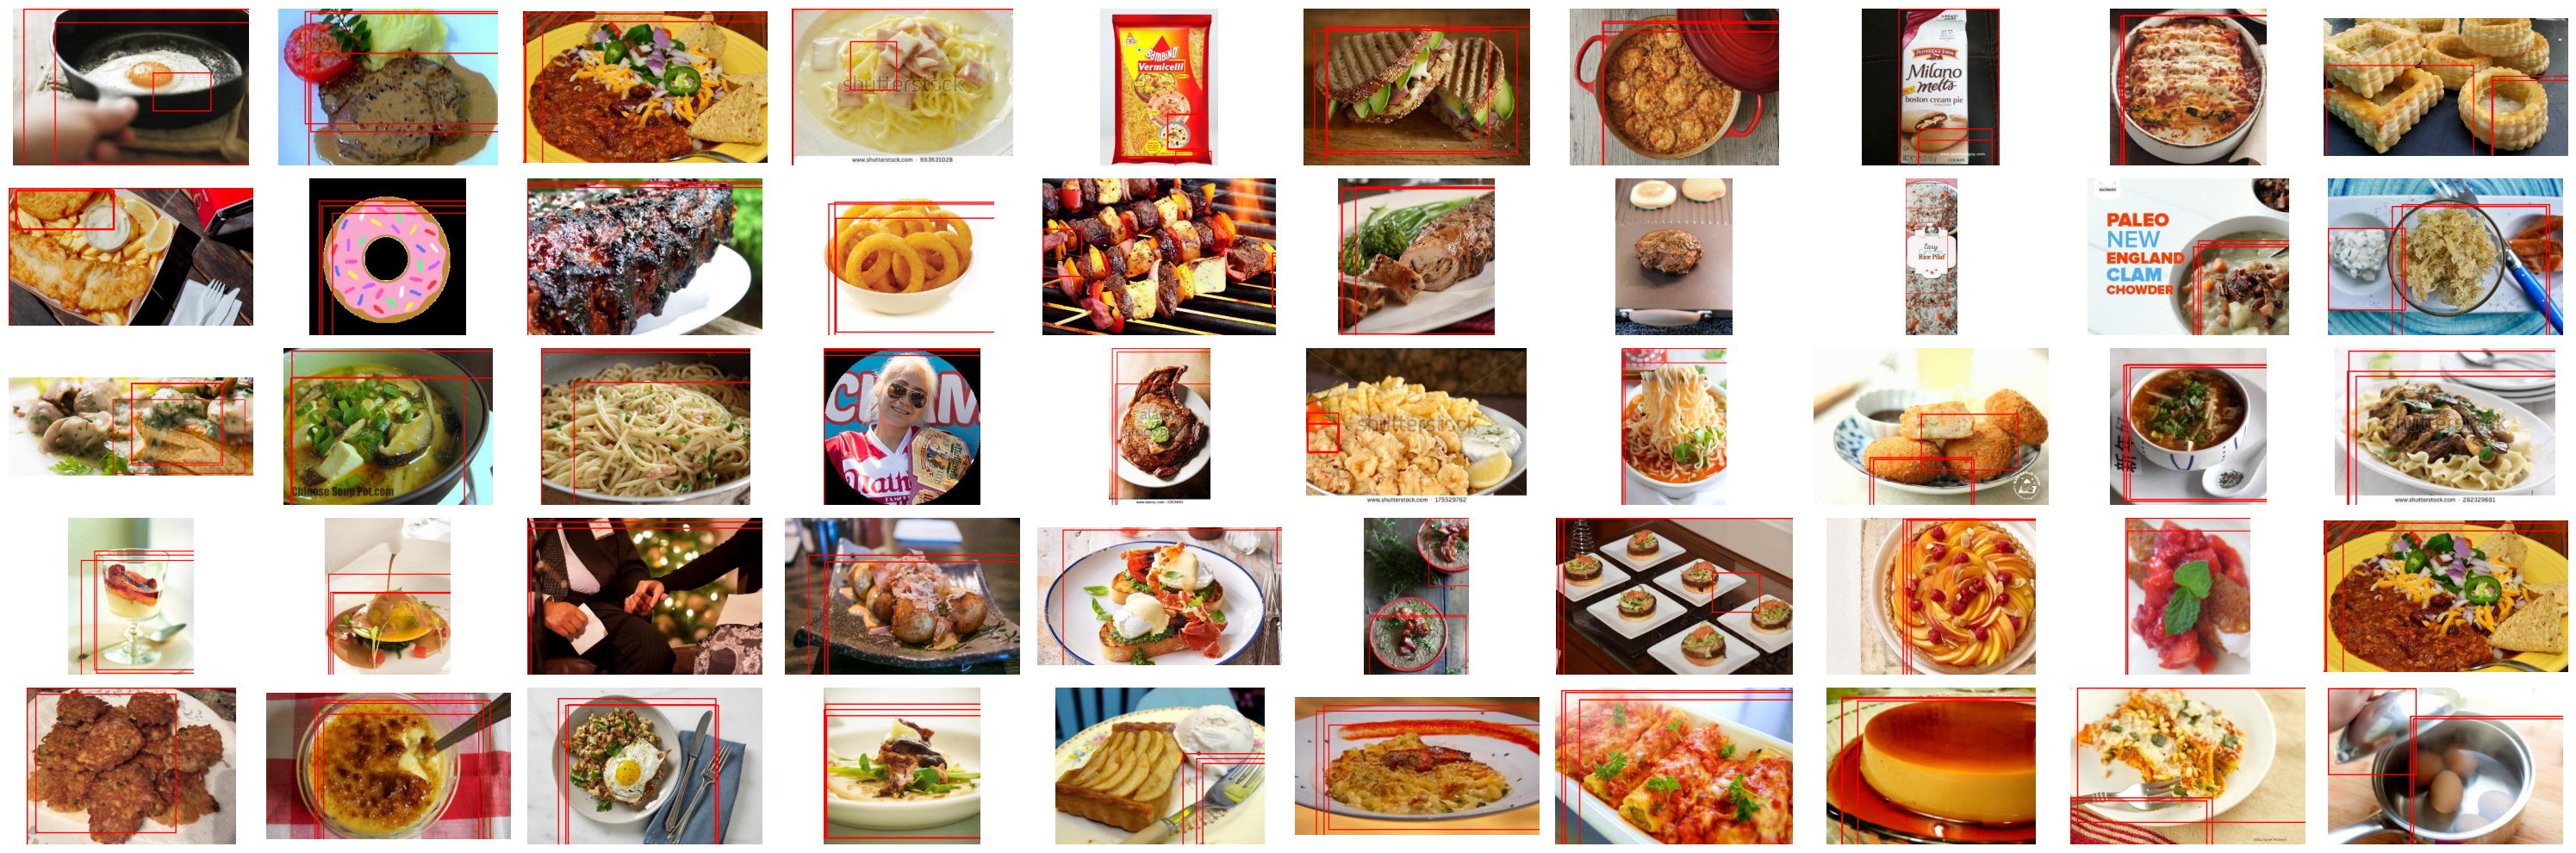

In [8]:
imgs = np.random.choice(df.Image, size=50)

fig, axs = plt.subplots(5, 10, figsize=(30, 10))
for i, img in enumerate(imgs):
  row = i // 10
  col = i % 10 
  apply_rpn(f"../Dataset/train_small/{img}", axs[row, col])

plt.tight_layout()
plt.show()